In [62]:
#####################################################
#   K-Measn Clustering                              #
#   Library and poackage: cluster()                 #
#   Dataset: Students Grade Assignment              #
#   Data has 5 columns, StudentID, Quiz 1, Quiz 2,  #            #
#   Quiz3,QUiz4 and Quiz5                           #
#   Date:   June 18, 2022                           #
#   Objective:   The K-Means clustering model aims     #
#   to create clusters based on students' performance  #  
#   in the different components of assignments         #
#   and exams - Quiz1, Quiz2, Quiz3, Quiz4 
#   and QUiz5                            # 
#                                                   #
#####################################################

In [3]:
#Step 1: Import all the libraries required to the jupyter environment

In [29]:
from __future__ import absolute_import, division, print_function
import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re

##Load pandas and numpy library 
import pandas as pd
import numpy as np


## Loading plot libraries
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

##Sklearn clustering libraires
from sklearn import cluster
from scipy.cluster import hierarchy

# Sklearn scaler() function to scale data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# TO learn more about the function, please refer to sklearn() documentation
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#https://scikit-learn.org/stable/modules/clustering.html

In [7]:
#Step 2: Reading Data

In [8]:
#Set the working directory where the dataset is stored before reading the dataset
data_dir = 'E:/Umesh-MAY2022/Personal-May2022/BA2ndEdition/2ndEdition/Book Chapters/Chapter 13 - Clustering/scripts'
os.chdir(data_dir)
grades_df = pd.read_csv("grades.csv")
grades_df.head()

,StudentID,Quiz1,Quiz2,Quiz3,Quiz4,Quiz5
0,20000001,10,10.0,27.0,95,8
1,20000002,8,3.0,23.5,75,9
2,20000003,14,15.0,28.0,70,8
3,20000004,12,16.5,28.0,100,9
4,20000005,13,11.5,21.5,95,9


In [13]:
#Step 3: Data exploration, data preparation
##Removing 'StudentID' column, that is not required for the clustering analysis
# Scale all the variables
grades_df2 = grades_df.drop('StudentID',axis=1)
scaler = MinMaxScaler()
grades_scaled = pd.DataFrame(scaler.fit_transform(grades_df2),
                             columns=grades_df2.columns)
grades_scaled.head()

,Quiz1,Quiz2,Quiz3,Quiz4,Quiz5
0,0.666667,0.20,0.727273,0.9,0.0
1,0.533333,0.06,0.515152,0.5,0.5
2,0.933333,0.30,0.787879,0.4,0.0
3,0.800000,0.33,0.787879,1.0,0.5
4,0.866667,0.23,0.393939,0.9,0.5


In [20]:
# Create the K-Means cluster model
# From the model, identify which studentID is in which cluster
kmm_model = cluster.KMeans(n_clusters=5, 
                           max_iter=50, 
                           n_init=5,
                          random_state = 10)
kmm_model.fit(grades_scaled)
grades_clusters = pd.DataFrame(kmm_model.labels_ ,
                              columns=['Cluster ID'],
                              index = grades_df.StudentID)
grades_clusters.head(10)

,Cluster ID
StudentID,
20000001,2
20000002,0
20000003,3
20000004,1
20000005,0
20000006,0
20000007,0
20000008,3
20000009,2


In [23]:
#Print the cluster centroids
pd.DataFrame(kmm_model.cluster_centers_, 
             columns=grades_df2.columns)

,Quiz1,Quiz2,Quiz3,Quiz4,Quiz5
0,0.608696,0.264348,0.565217,0.752174,5.217391e-01
1,0.837500,0.393750,0.734848,0.931250,7.187500e-01
2,0.852482,0.306596,0.710509,0.885106,1.110223e-16
3,0.685714,0.283333,0.474747,0.395238,-2.775558e-17
4,0.497222,0.326250,0.540404,0.895833,-2.775558e-17


C:\Users\u.hodeghatta\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


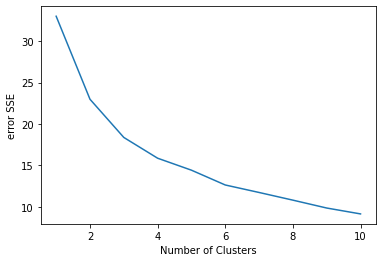

In [25]:
#To determine the value of K, number of clusters in the data, 
# We can use elbow method or "silhouette" method
# We will use the "Elbow" method
# we use k-values from 1 to 10 and compute their 
# corresponding sum-of-squared errors (SSE) 
# as shown in the example below. 
# Find the "elbow" from the plot of SSE versus 
# number of clusters 
def k_elbowFunc(ks, data_df):
    error = []
    for k in ks:
        kmm_mods = cluster.KMeans(n_clusters=k, 
                           max_iter=50, 
                           n_init=5,
                          random_state = 10)
        kmm_mods.fit(data_df)
        error.append(kmm_mods.inertia_)
    plt.plot(ks, error)
    plt.xlabel('Number of Clusters')
    plt.ylabel('error SSE')

kmm_values = [1,2,3,4,5,6,7,8,9,10]
k_elbowFunc(kmm_values, grades_scaled)

In [89]:
# Create the K-Means cluster model with optimized K =3
# From the model, identify which studentID is in which cluster
kmm_model_k3 = cluster.KMeans(n_clusters=3, 
                           max_iter=50, 
                           n_init=5,
                          random_state = 10)
kmm_model_k3.fit(grades_scaled)
grades_clusters = pd.DataFrame(kmm_model_k3.labels_ ,
                              columns=['Cluster ID'],
                              index = grades_df.StudentID)
grades_clusters.head(10)

,Cluster ID
StudentID,
20000001,0
20000002,1
20000003,0
20000004,2
20000005,2
20000006,2
20000007,2
20000008,1
20000009,0


<AxesSubplot:xlabel='pca_1', ylabel='pca_2'>

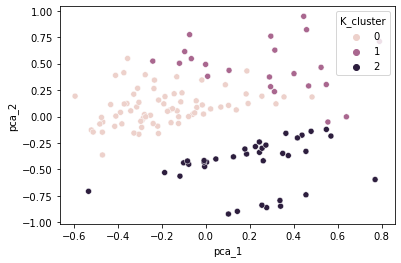

In [90]:
from sklearn.manifold import MDS
import seaborn as sns
pca_embed = MDS(n_components=2)
pca_mds = pd.DataFrame(pca_embed.fit_transform(grades_scaled),
             columns = ['pca_1','pca_2'])

pca_mds['K_cluster'] = kmm_model_k3.predict(grades_scaled)

sns.scatterplot(data=pca_mds,x = "pca_1",y="pca_2",hue="K_cluster")

In [41]:
 #Hierarchical Clustering
# Create clustering using Single linkage

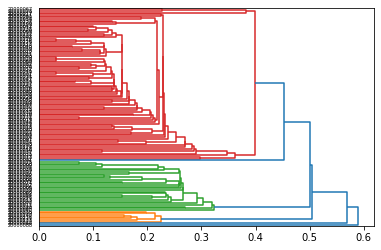

In [40]:
cluster_hier  = hierarchy.linkage(grades_scaled,
                                  'single')
cluster_dendo = hierarchy.dendrogram(cluster_hier,
                                    orientation='right',
                                    labels = grades_df['StudentID'].to_list())

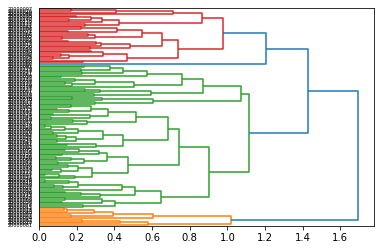

In [42]:
#Hierarchical Clustering
# Create clustering using "complete linkage"
cluster_hier  = hierarchy.linkage(grades_scaled,
                                  'complete')
cluster_dendo = hierarchy.dendrogram(cluster_hier,
                                    orientation='right',
                                    labels = grades_df['StudentID'].to_list())


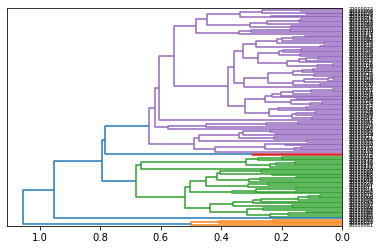

In [57]:
#Hierarchical Clustering
# Create clustering using "Group Average linkage"
cluster_hier  = hierarchy.linkage(grades_scaled,
                                  'average')
cluster_dendo = hierarchy.dendrogram(cluster_hier,
                                    orientation='left',
            labels = grades_df['StudentID'].to_list())


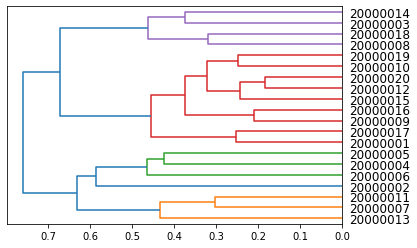

In [64]:
#Hierarchical Clustering
# Create clustering using "Group Average linkage"
##To have a better view, reduce X, Y axis
grades_scaled_20 = grades_scaled[0:20]
cluster_hier_20  = hierarchy.linkage(grades_scaled_20,
                                  'average')
cluster_dendo = hierarchy.dendrogram(cluster_hier_20,
                                    orientation='left',
            labels = grades_df['StudentID'].to_list()[0:20])


In [92]:
!pandoc BA2-13-Clustering-KMeans_06192022.ipynb -s -o Kmeans_Clustering_WordFile.docx